In [89]:
#!pip install -q numpy==1.26.4

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

from sqlalchemy import create_engine

In [91]:
# db_config = {
#     'user': 'praktikum_student',
#     'pwd': 'Sdf4$2;d-d30pp', 
#     'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
#     'port': 6432,
#     'db': 'data-science-vehicle-db'
# } 

# connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
#     db_config['user'],
#     db_config['pwd'],
#     db_config['host'],
#     db_config['port'],
#     db_config['db']
# )

# engine = create_engine(connection_string)

In [92]:
# query = '''
# SELECT
#     c.*,
#     p.party_number, p.party_type, p.at_fault, p.insurance_premium, p.party_sobriety, p.party_drug_physical, p.cellphone_in_use,
#     v.vehicle_type, v.vehicle_transmission, v.vehicle_age
# FROM
#     collisions c
# INNER JOIN
#     parties p ON c.case_id = p.case_id
# INNER JOIN
#     vehicles v ON c.case_id = v.case_id
# WHERE
#     c.collision_date BETWEEN '2012-01-01' AND '2012-12-31'
#     AND c.collision_damage != 'scratch';
# '''

In [93]:
# data = pd.read_sql_query(query, con=engine)
# data.to_csv('data/df.csv', index=False)

In [94]:
data = pd.read_csv('data/df.csv')

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125847 entries, 0 to 131459
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   case_id                      125847 non-null  int64         
 1   county_city_location         125847 non-null  int64         
 2   county_location              125847 non-null  object        
 3   distance                     125847 non-null  float64       
 4   direction                    125847 non-null  object        
 5   intersection                 125847 non-null  category      
 6   weather_1                    125847 non-null  category      
 7   location_type                125847 non-null  category      
 8   collision_damage             125847 non-null  object        
 9   party_count                  125847 non-null  category      
 10  primary_collision_factor     125847 non-null  category      
 11  pcf_violation_category       12

In [ ]:
data = data.drop_duplicates()
data = data[data['distance'] < 1584000.0]
data.direction = data.direction.fillna('unknown').astype('category')
data.intersection = data.intersection.fillna('3.0').astype('category')
data.weather_1 = data.weather_1.fillna('unknown').astype('category')
data.location_type = data.location_type.fillna('unknown').astype('category')
data.collision_damage = data.collision_damage.astype('category')
data.party_count = data.party_count.apply(lambda x: '5+' if x > 4 else x).astype('category')
data.primary_collision_factor = data.primary_collision_factor.fillna('unknown').astype('category')
data.pcf_violation_category = data.pcf_violation_category.fillna('unknown').astype('category')
data.type_of_collision = data.type_of_collision.fillna('other').astype('category')
data.motor_vehicle_involved_with = data.motor_vehicle_involved_with.fillna('unknown').astype('category')
data.road_surface = data.road_surface.fillna('unknown').astype('category')
data.road_condition_1 = data.road_condition_1.fillna('other').astype('category')
data.lighting = data.lighting.fillna('unknown').astype('category')
data.control_device = data.control_device.fillna('unknown').astype('category')
data.collision_date = pd.to_datetime(data.collision_date)
data['collision_month'] = data.collision_date.dt.month
data['collision_day'] = data.collision_date.dt.day
data.collision_time = pd.to_datetime(data.collision_time, format='%H:%M:%S')
data['collision_hour'] = data.collision_time.dt.hour
data.party_number = data.party_number.apply(lambda x: '5+' if x > 4 else x).astype('category')
data.party_type = data.party_type.fillna('other').astype('category')
data.at_fault = data.at_fault.astype('category')
data.party_sobriety = data.party_sobriety.fillna('unknown').astype('category')
data.party_drug_physical = data.party_drug_physical.astype('category')
data.cellphone_in_use = data.cellphone_in_use.fillna('3.0').astype('category')
data.vehicle_type = data.vehicle_type.astype('category')
data.vehicle_transmission = data.vehicle_transmission.fillna('unknown').astype('category')
data = data[data['vehicle_age'] < 161.0]

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)



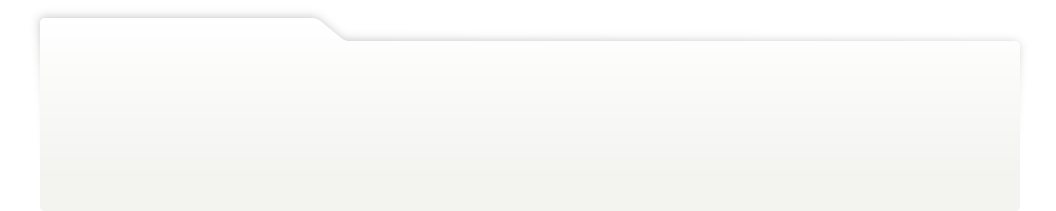
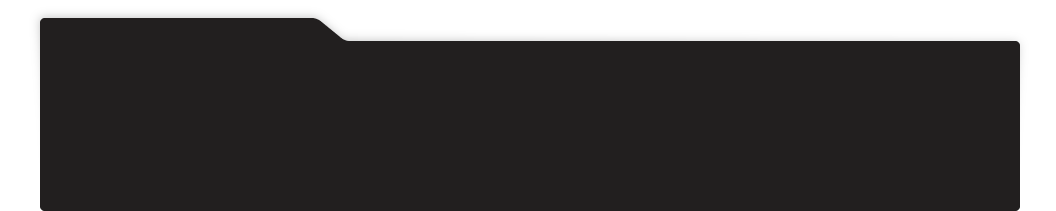
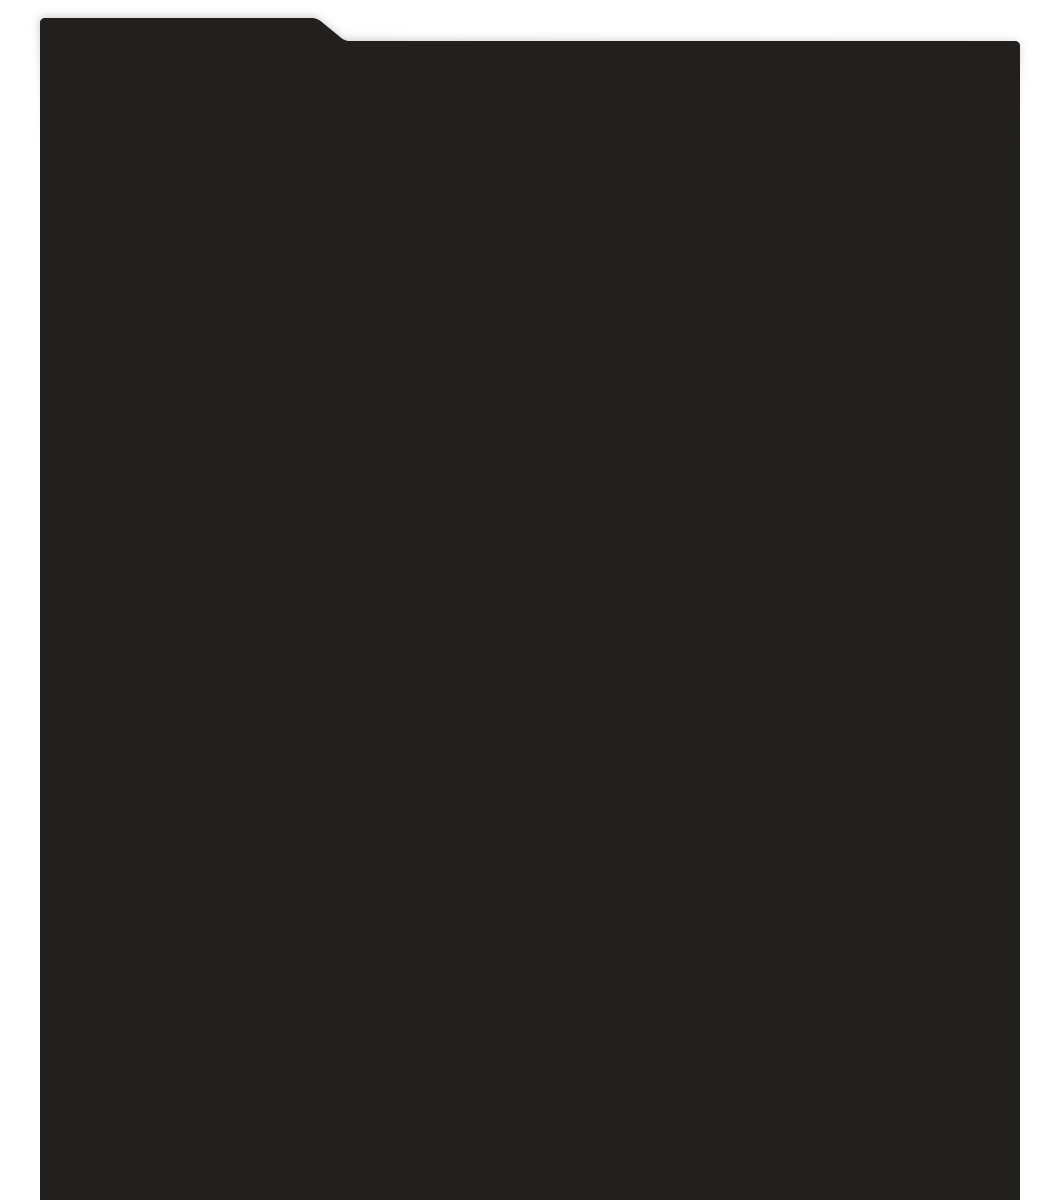
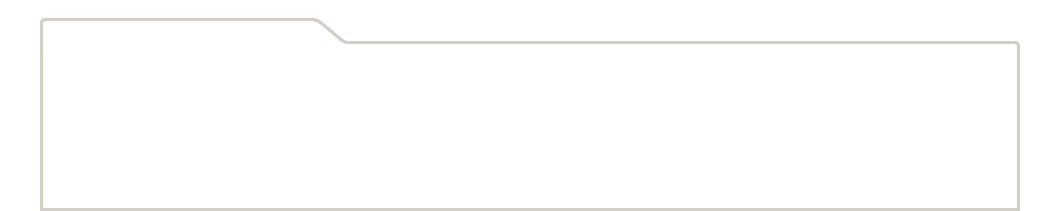
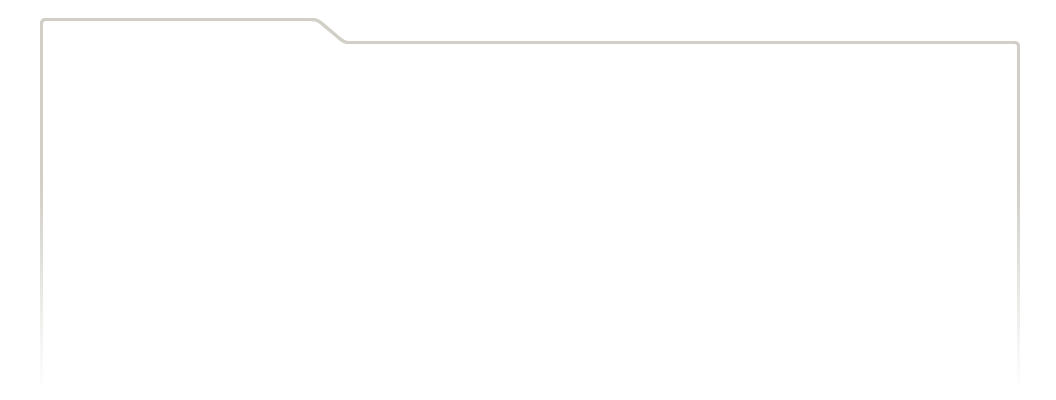
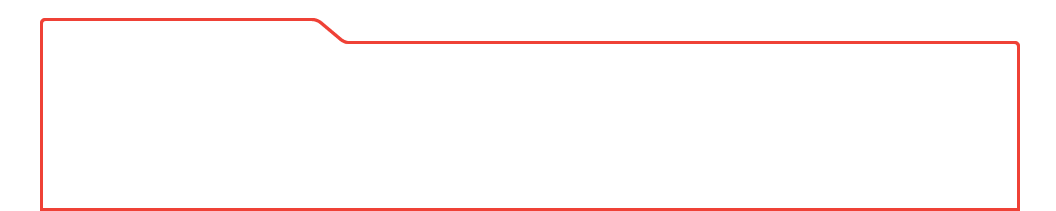
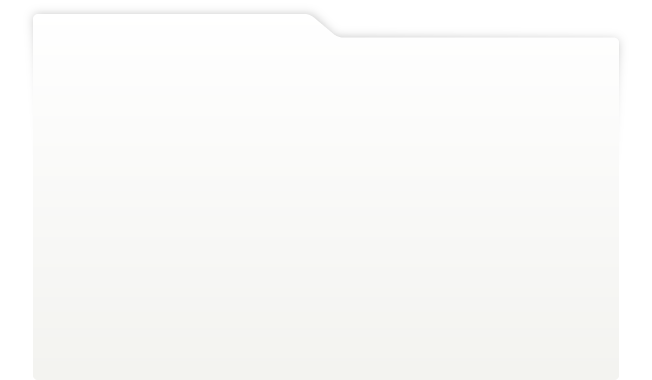
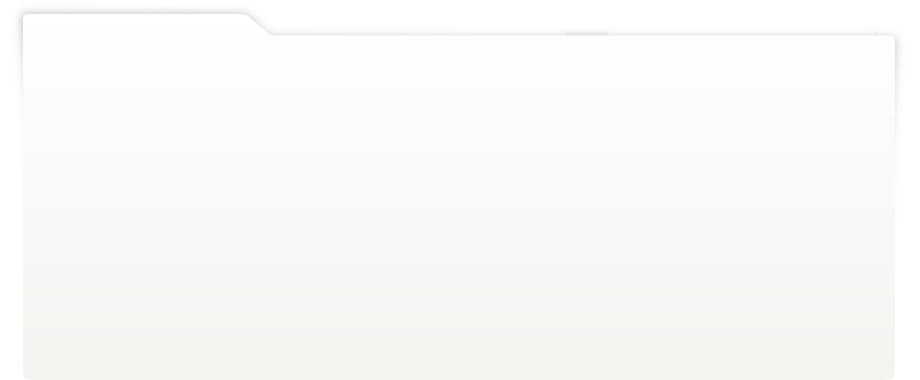
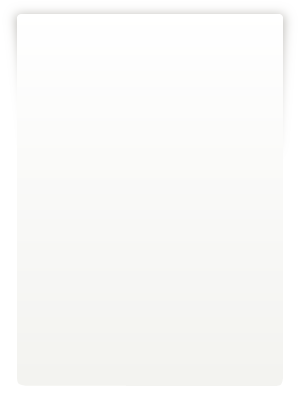
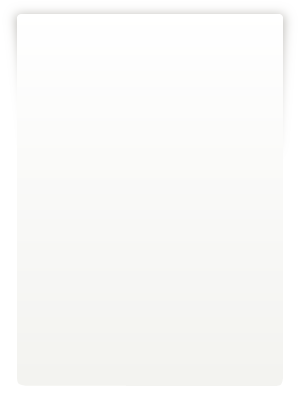
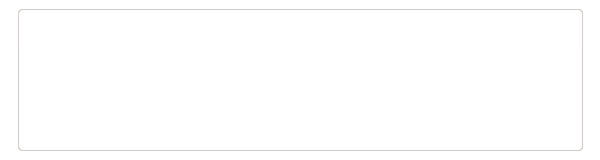
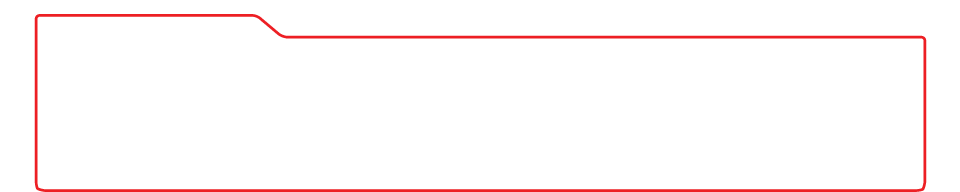
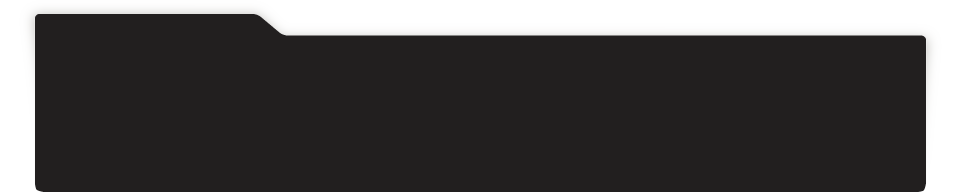
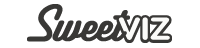
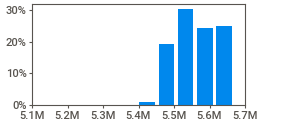
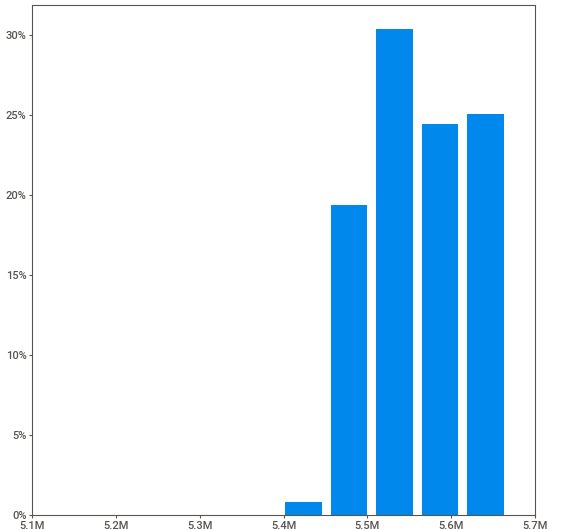
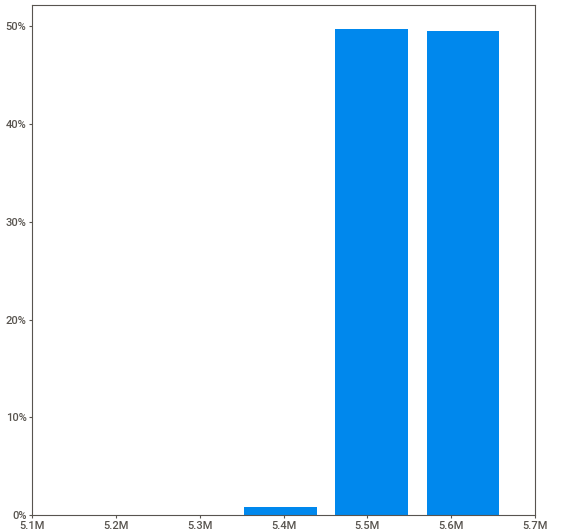
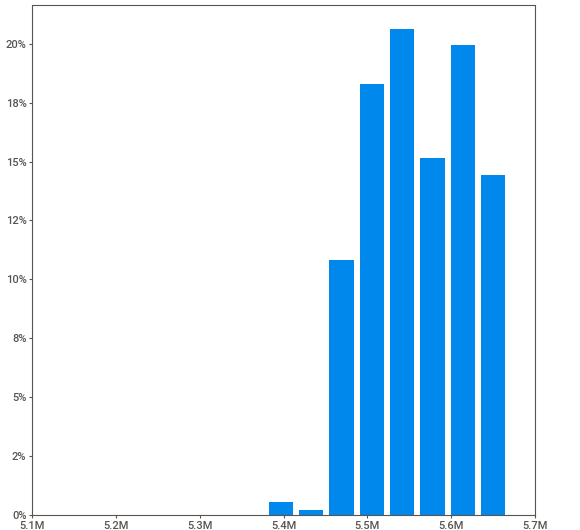
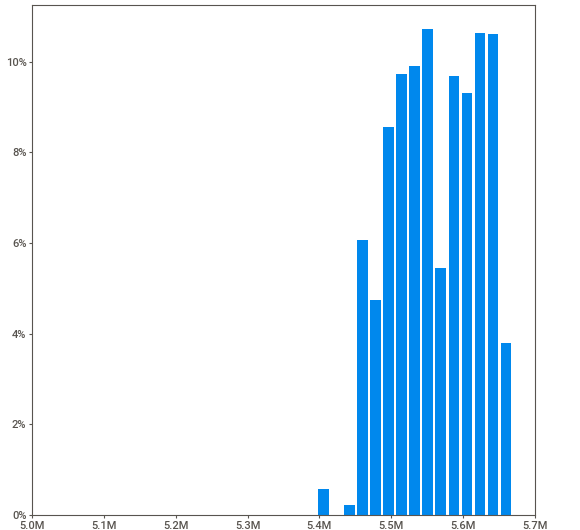
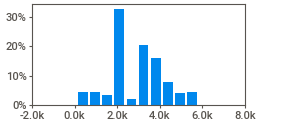
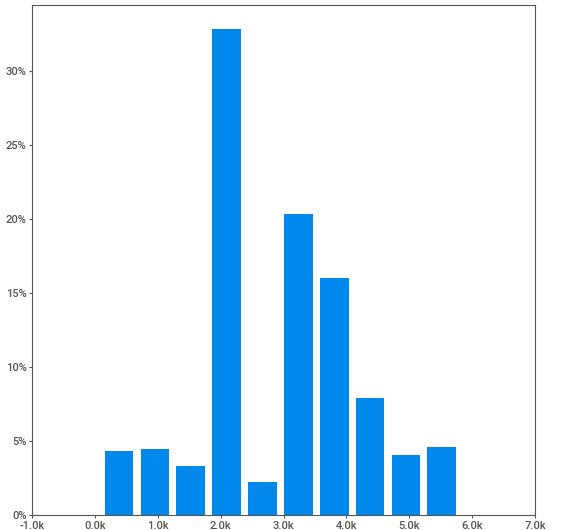
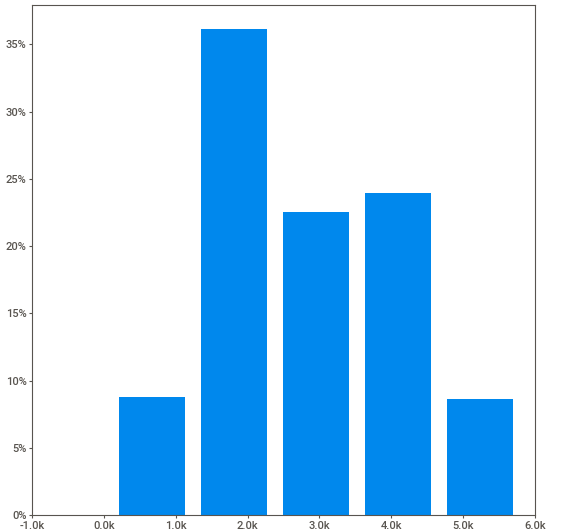
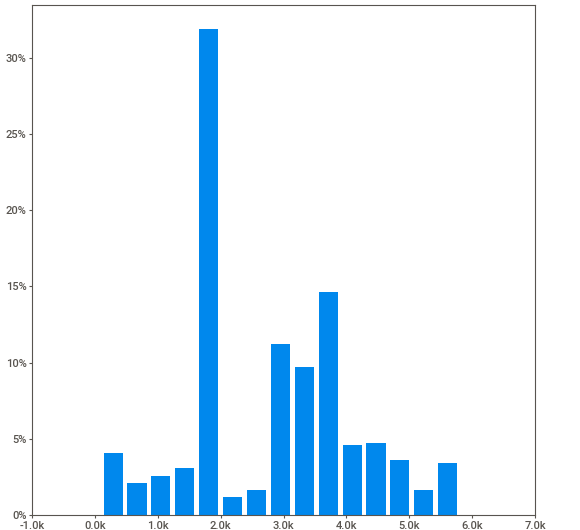
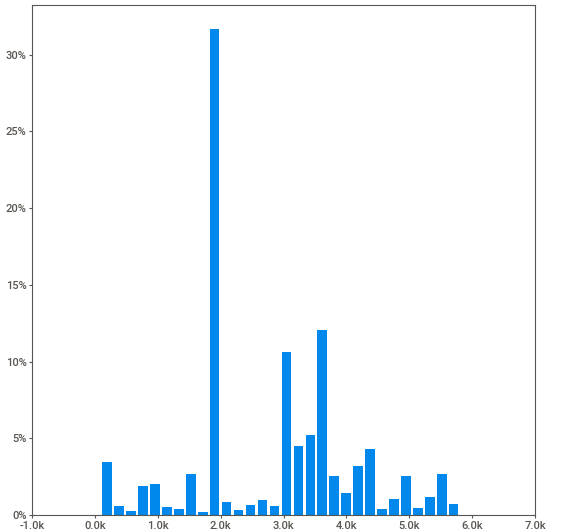
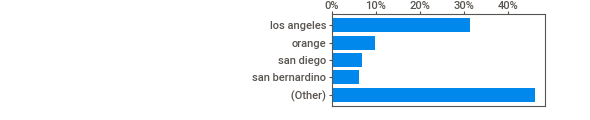
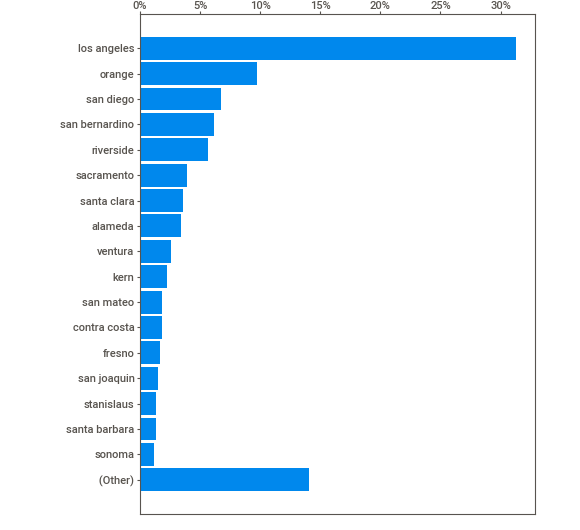
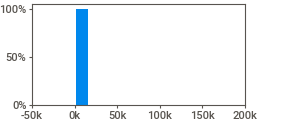
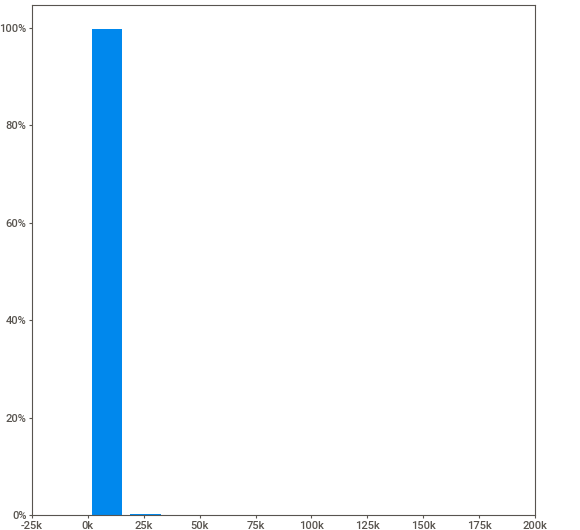
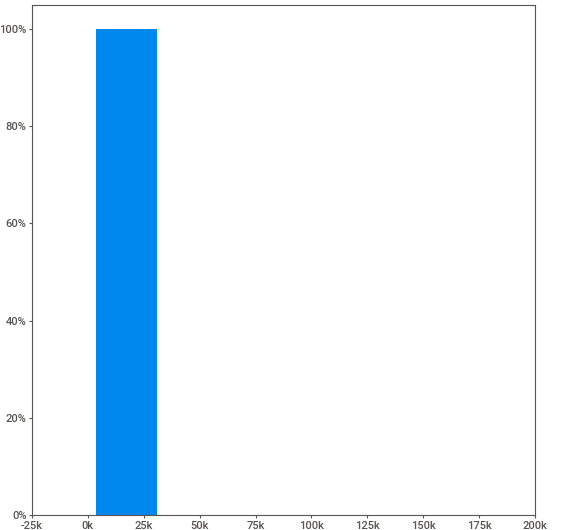
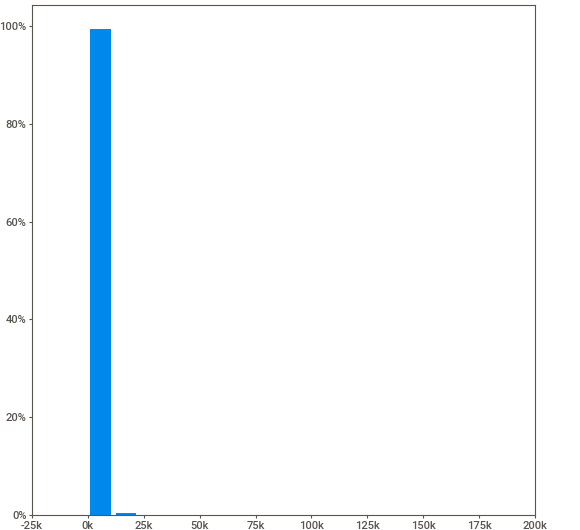
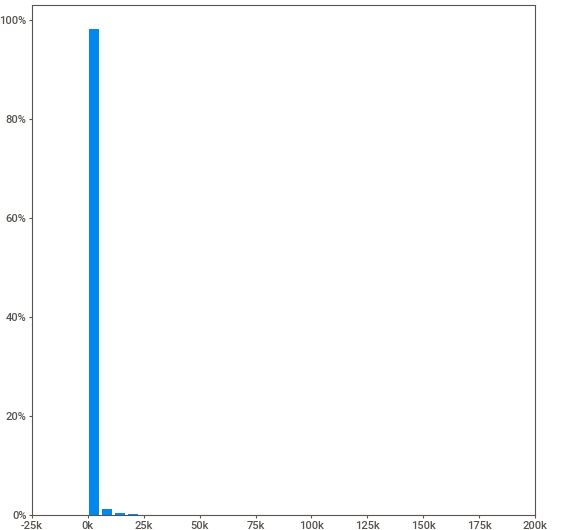
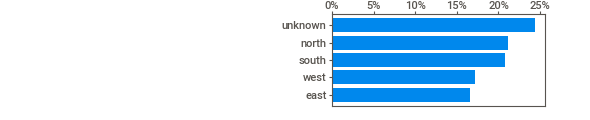
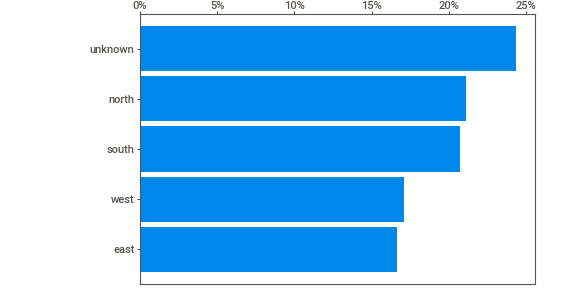
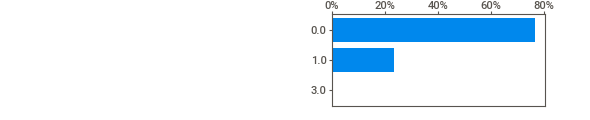
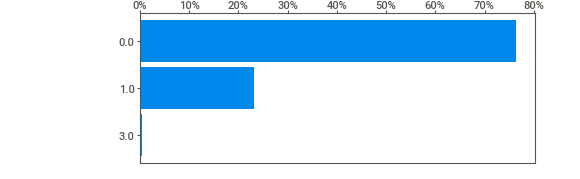
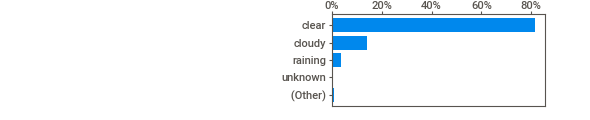
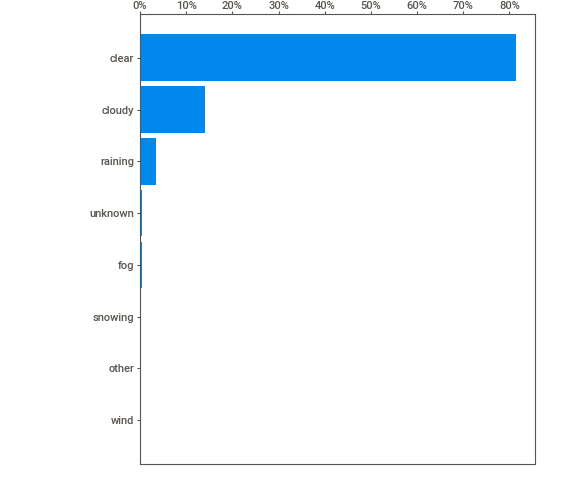
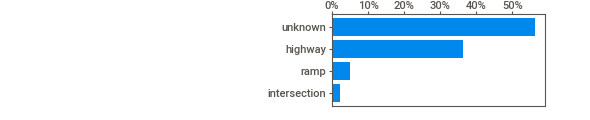
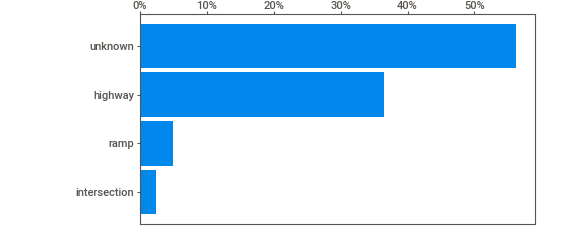
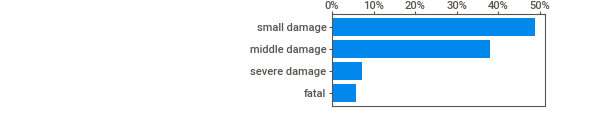
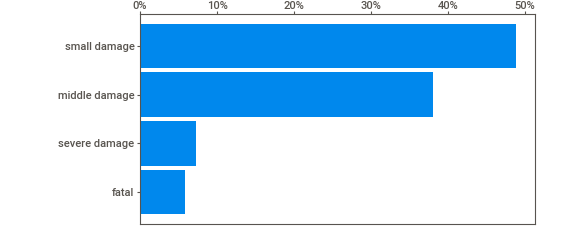
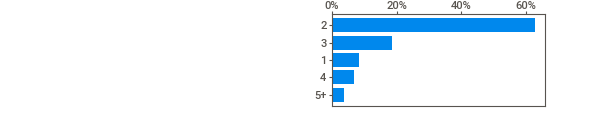
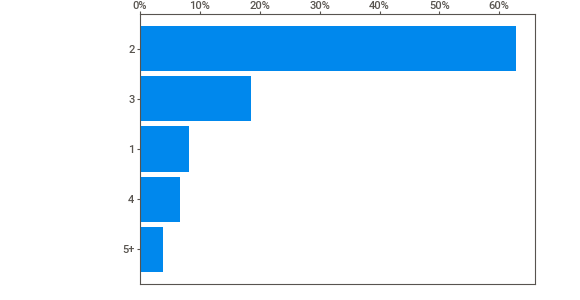
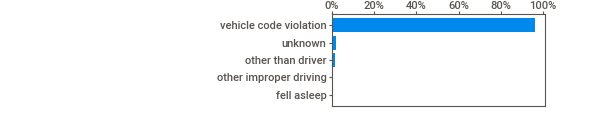
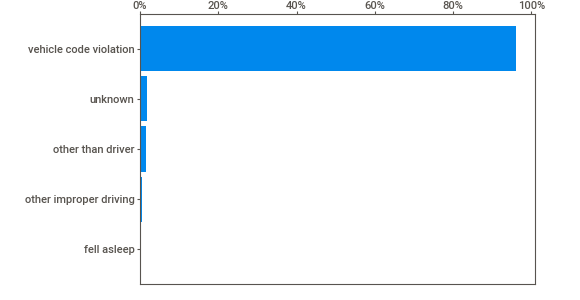
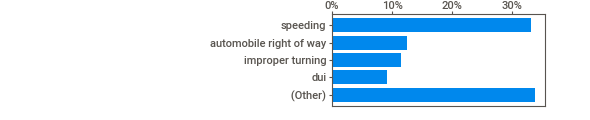
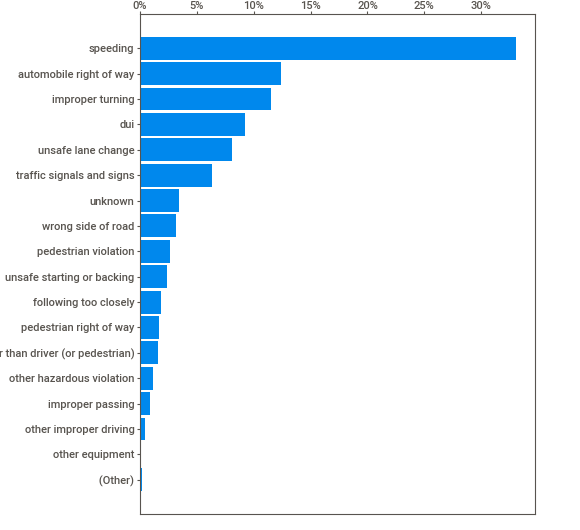
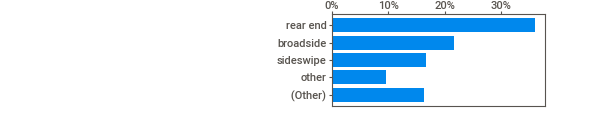
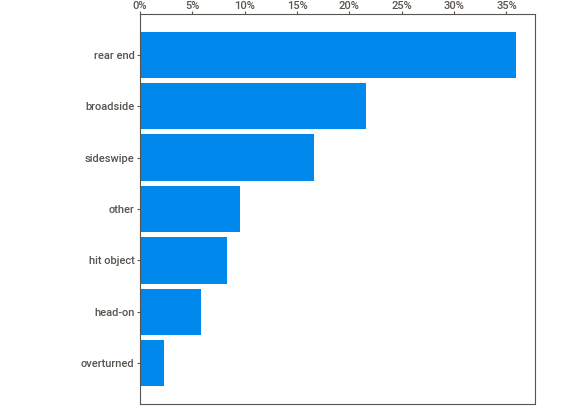
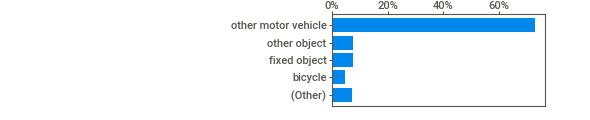
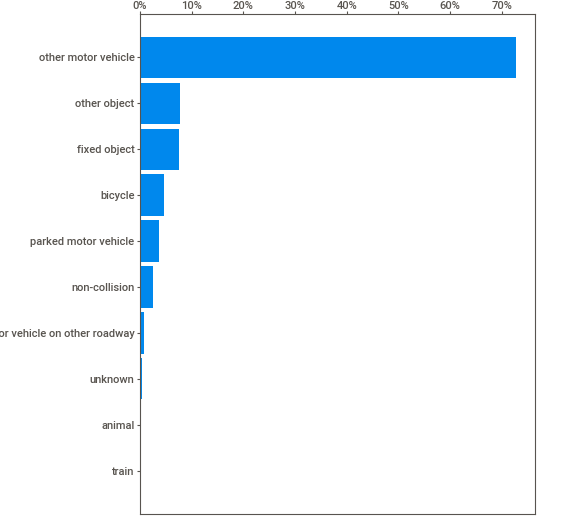
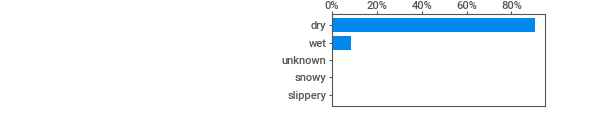
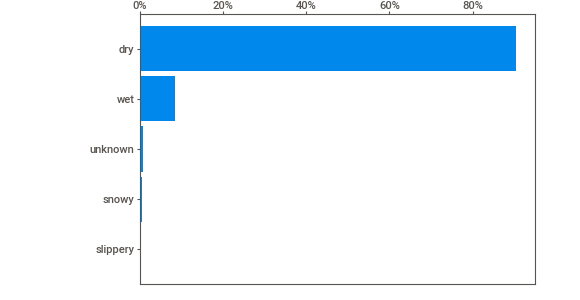
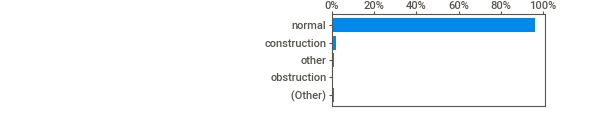
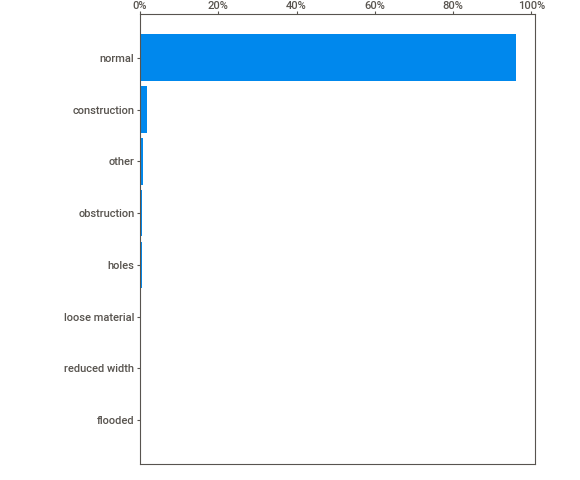
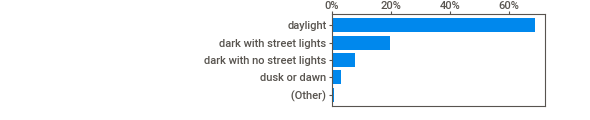
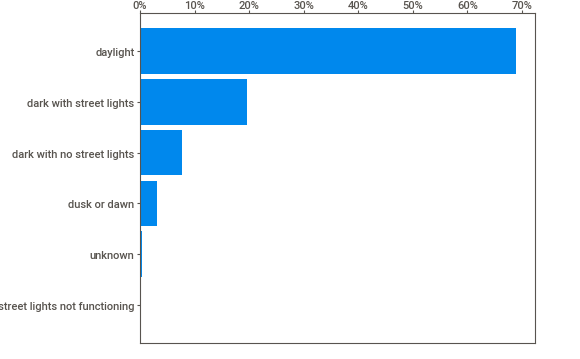
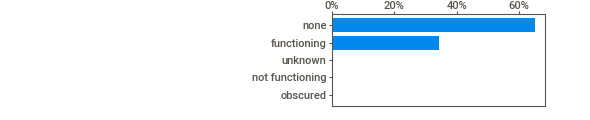
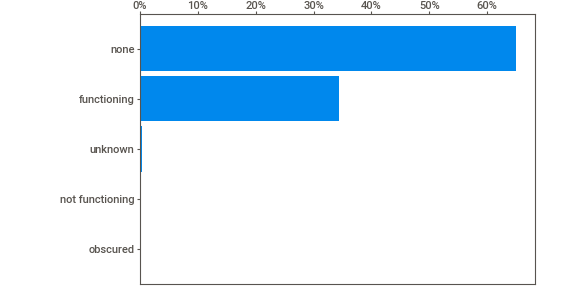
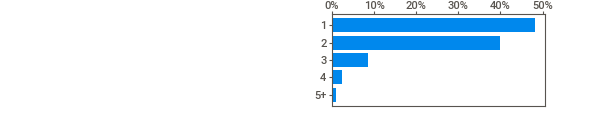
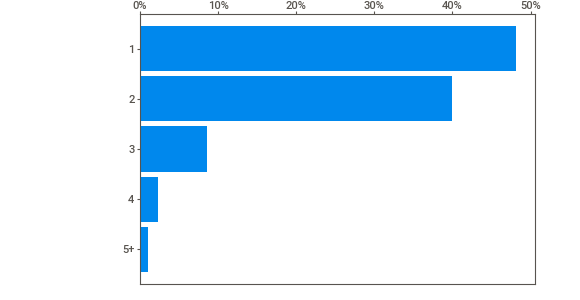
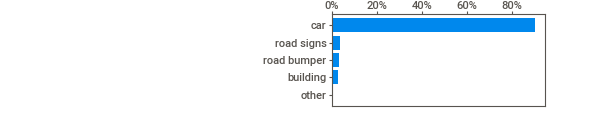
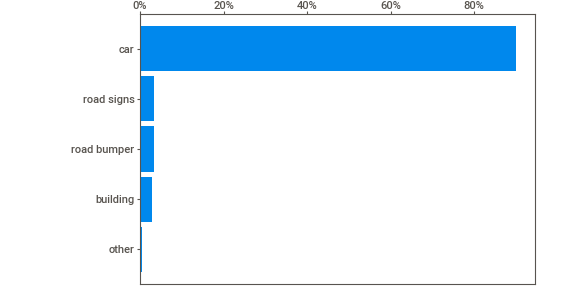
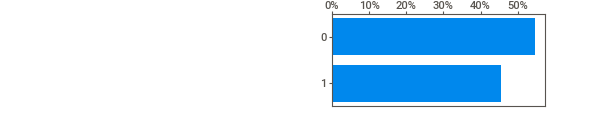
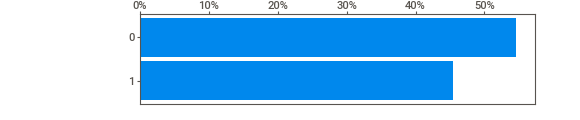
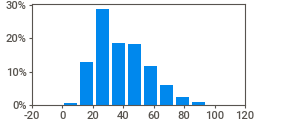
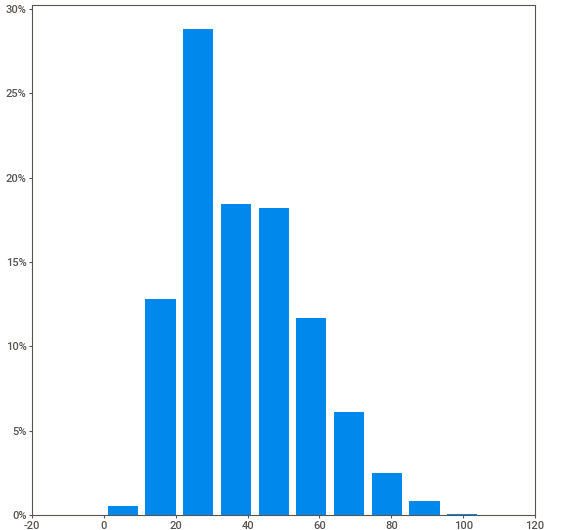
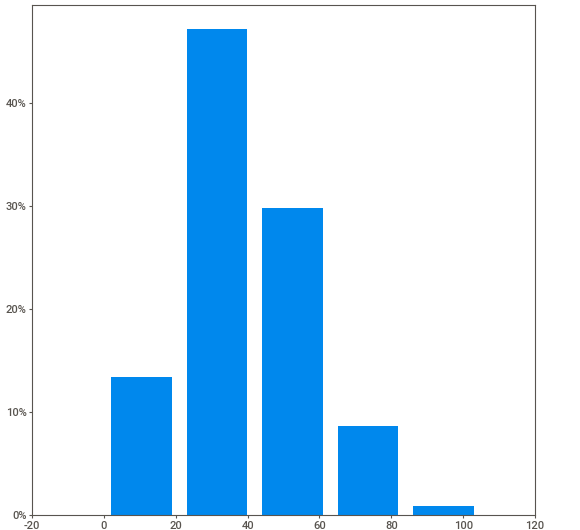
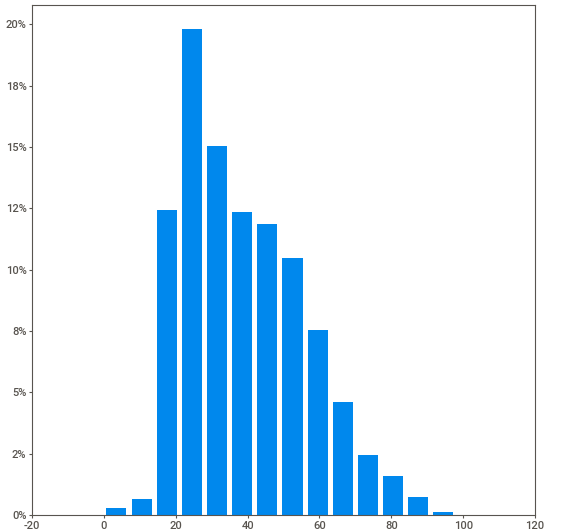
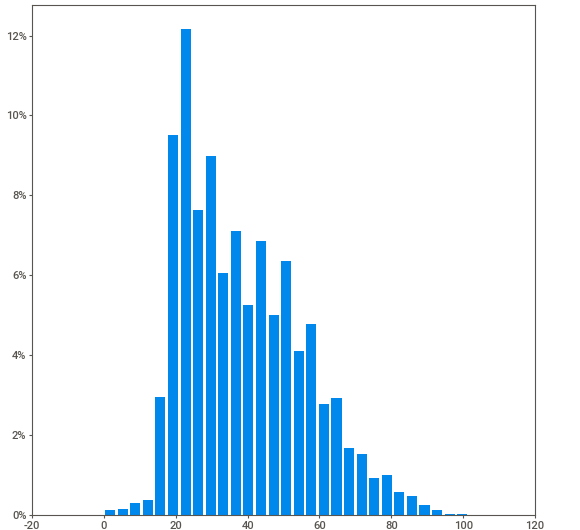
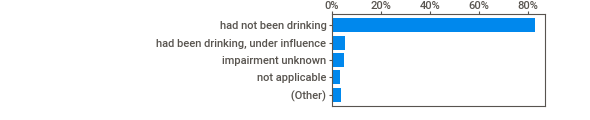
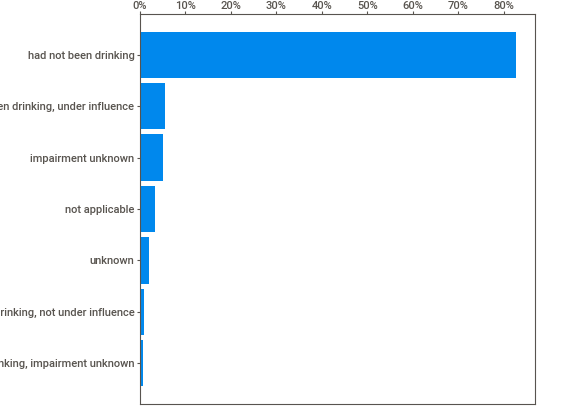
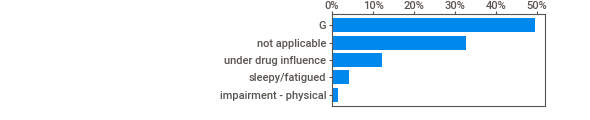
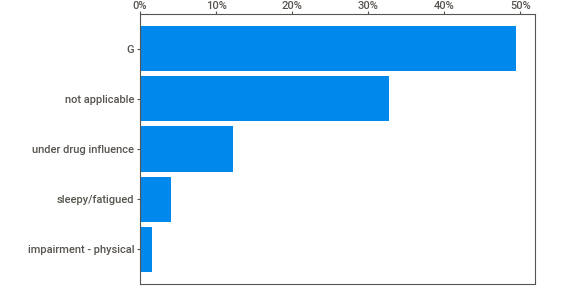
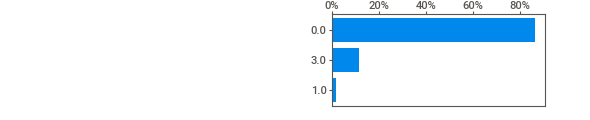
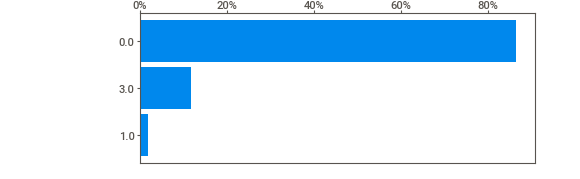
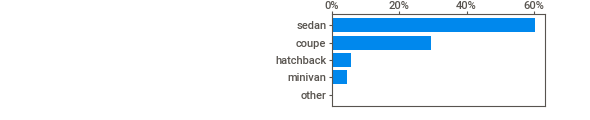
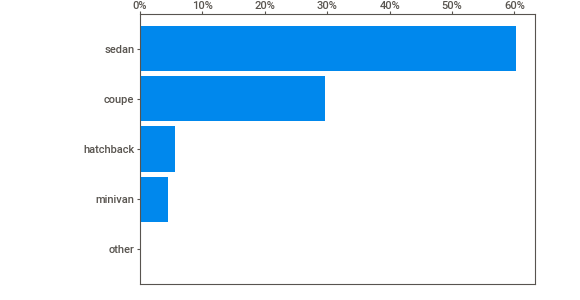
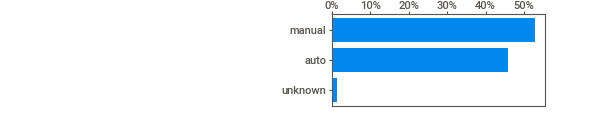
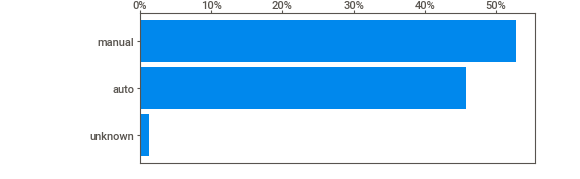
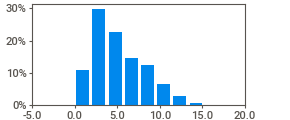
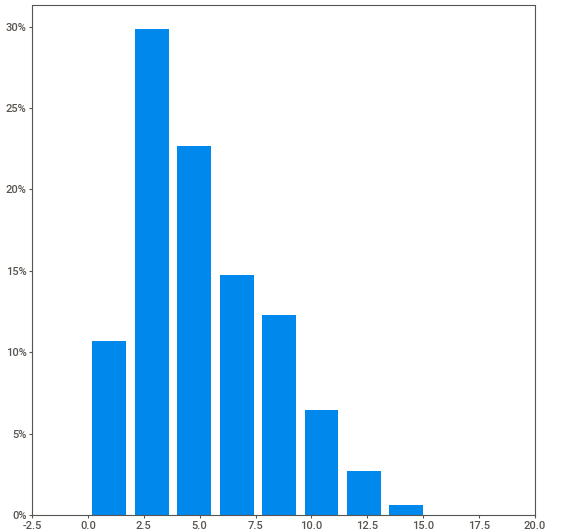
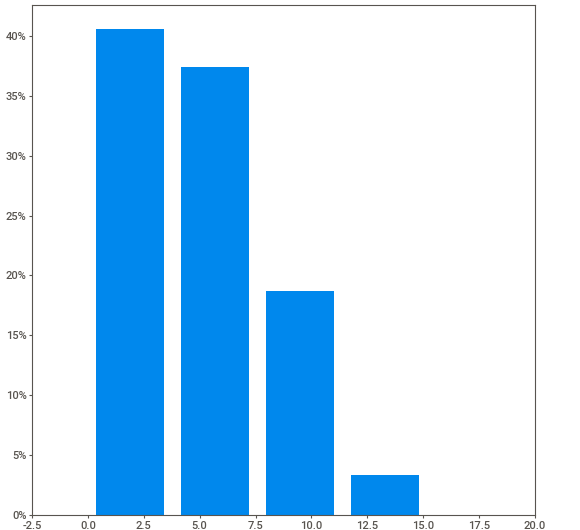
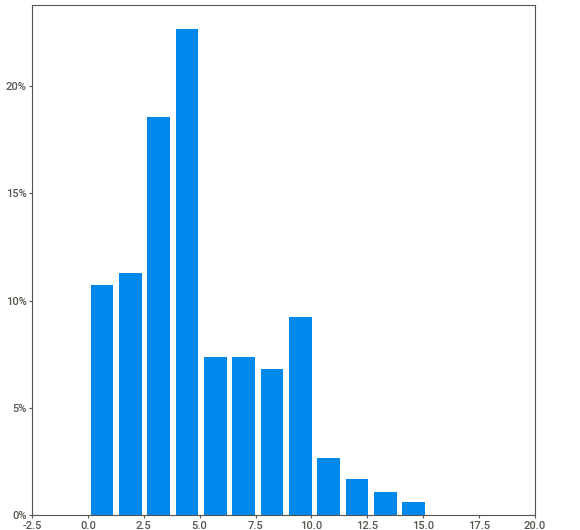
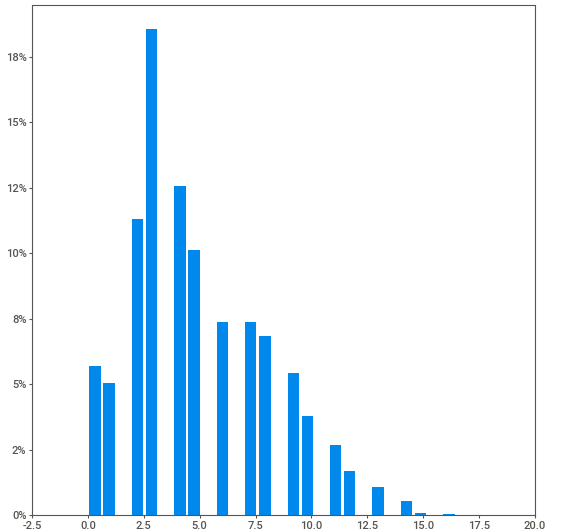
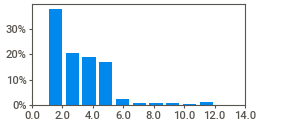
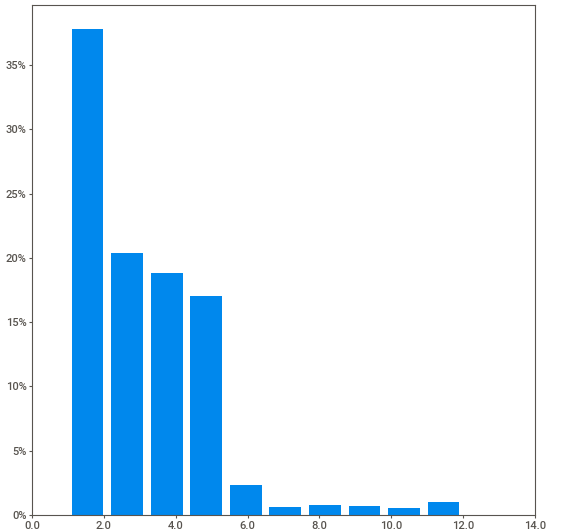
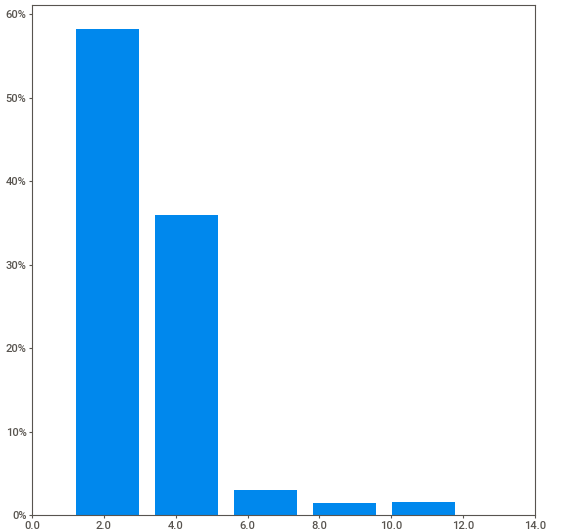
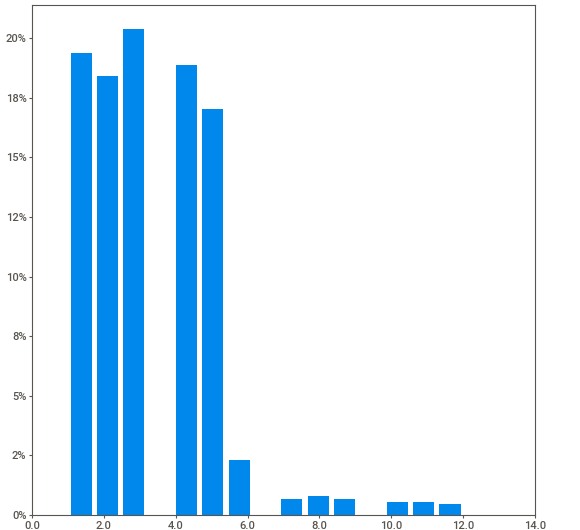
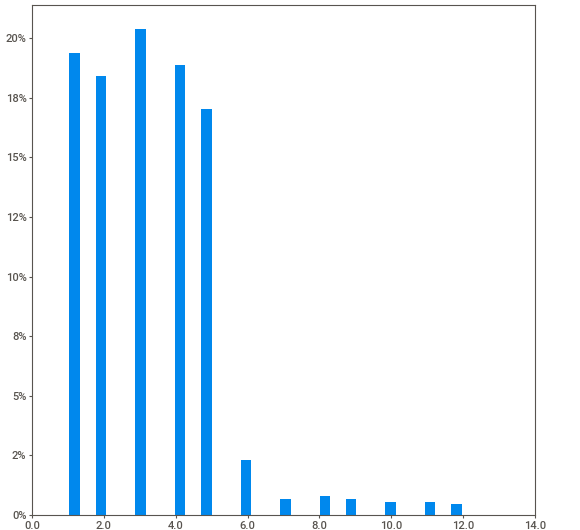
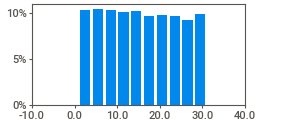
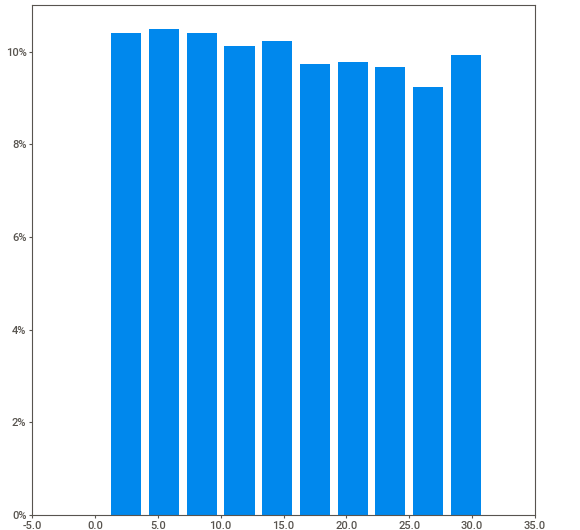
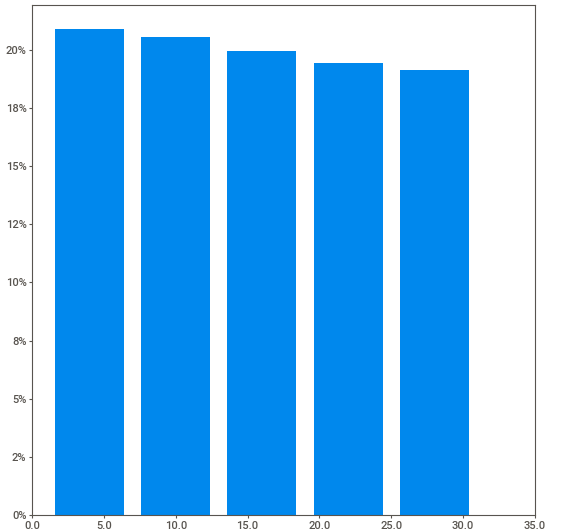
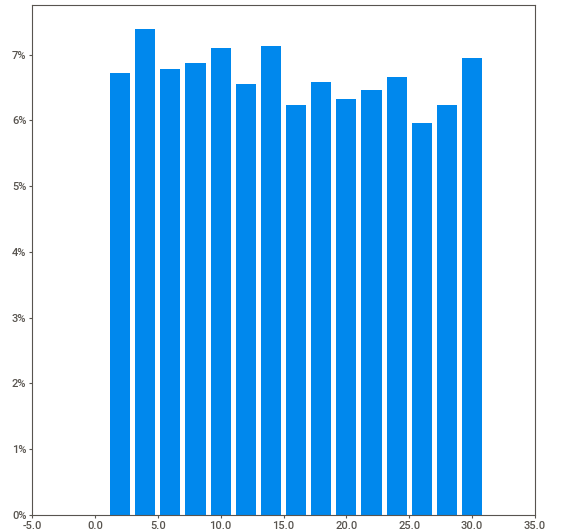
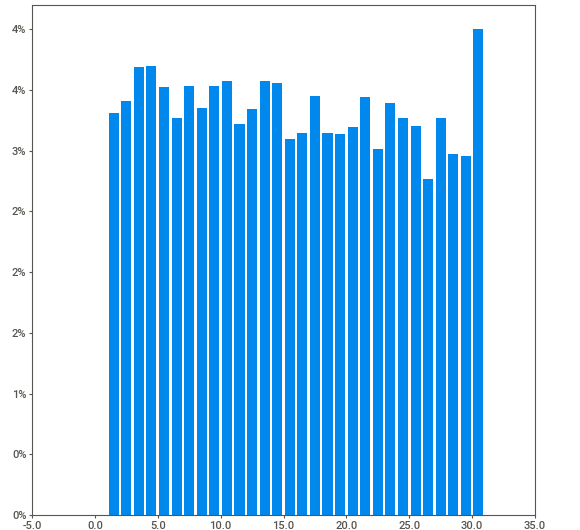
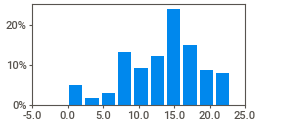
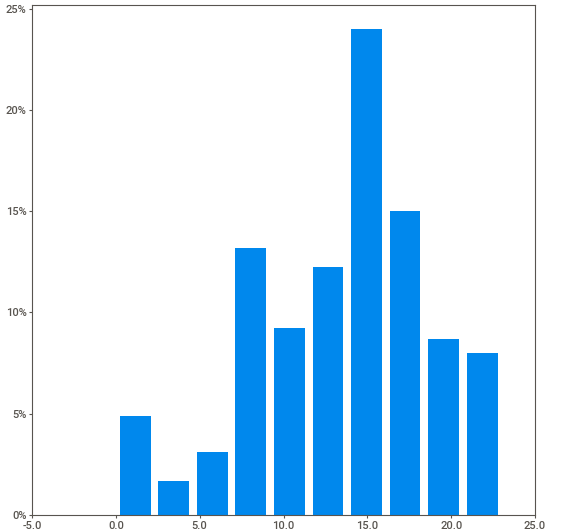
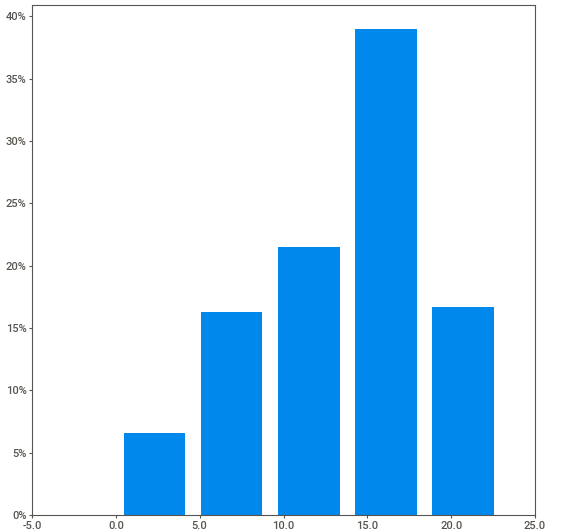
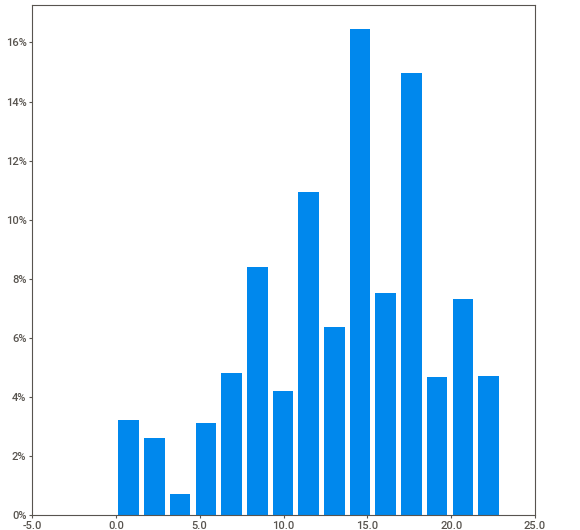
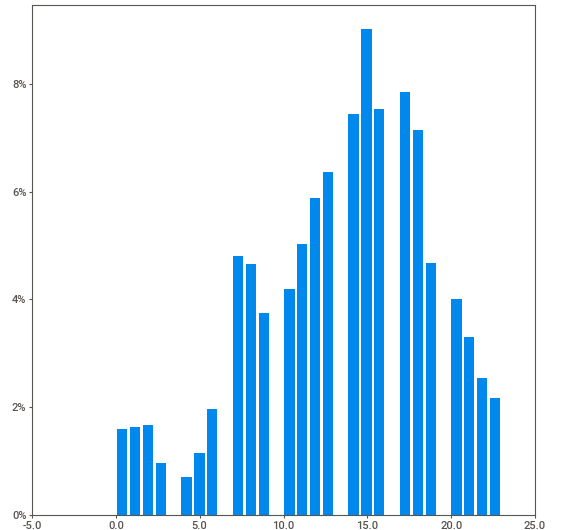
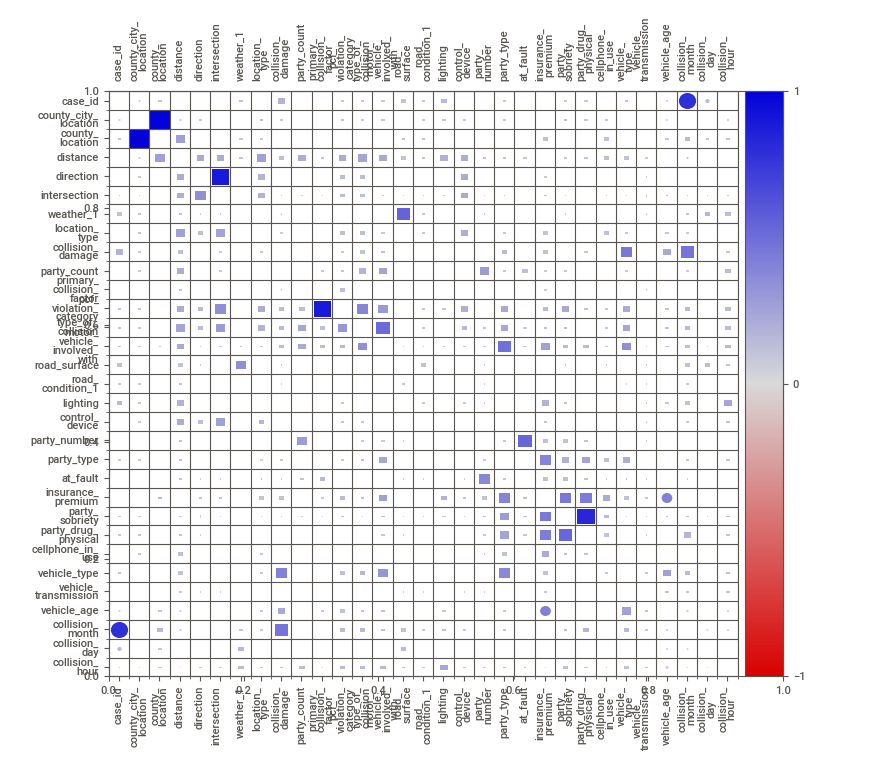
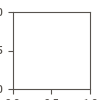

In [97]:
report = sv.analyze(data)
report.show_notebook()

In [98]:
data.head()

,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,...,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use,vehicle_type,vehicle_transmission,vehicle_age,collision_month,collision_day,collision_hour
0,5403084,1942,los angeles,41.0,east,0.0,clear,unknown,fatal,2,...,32.0,impairment unknown,G,0.0,sedan,manual,3.0,1,18,14.0
1,5403084,1942,los angeles,41.0,east,0.0,clear,unknown,fatal,2,...,32.0,impairment unknown,G,0.0,hatchback,auto,5.0,1,18,14.0
2,5454127,3600,san bernardino,15840.0,east,0.0,clear,highway,small damage,3,...,38.0,had not been drinking,NaN,0.0,sedan,manual,5.0,1,21,13.0
3,5454127,3600,san bernardino,15840.0,east,0.0,clear,highway,small damage,3,...,38.0,had not been drinking,NaN,0.0,sedan,auto,6.0,1,21,13.0
4,5454261,1942,los angeles,5.0,east,0.0,clear,unknown,severe damage,3,...,32.0,had not been drinking,NaN,0.0,hatchback,manual,0.0,2,2,18.0
